<a href="https://colab.research.google.com/github/hpink97/tensorflow_keras_practice/blob/main/linear_classifier_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create Linear Regression model from scratch using tensorflow

### 1) Load libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


### Generate random data of two groups

In [60]:
n_per_grp = 750
grp_covariance = [[0.75,0.75],[0.5,1]]
grp0 = np.random.multivariate_normal(
    mean =[-1,1.5],
    cov = grp_covariance, 
    size = n_per_grp
)

grp1 = np.random.multivariate_normal(
    mean =[0,0],
    cov = grp_covariance, 
    size = n_per_grp
)

##combine data 
inputs = np.vstack((grp0, grp1)).astype(np.float32)
inputs.shape



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':


(1500, 2)

In [61]:
#### generate target variables

grp0_target = np.zeros((n_per_grp,1),dtype='float32')
grp1_target = np.ones((n_per_grp,1),dtype='float32')

targets = np.vstack((grp0_target, grp1_target))
targets.shape

(1500, 1)

### Plot the data

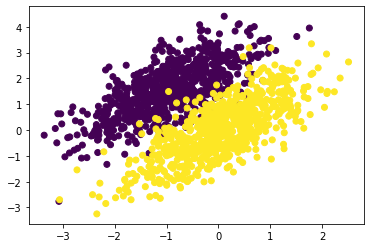

In [62]:
plt.scatter(inputs[:,0], inputs[:,1], c= targets[:,0])

### 2) Generate linear classifier varaibles
- important to set these as tf.Variables, so they can be modified in training

In [63]:
##define shape of the data
input_dim = inputs.shape[1]
output_dim = targets.shape[1]

##start off with random weights in the specified dimensions
W = tf.Variable(
    initial_value=tf.random.uniform(shape=(input_dim, output_dim))
)

b = tf.Variable(
    initial_value=tf.zeros(shape=(output_dim,))
)

print('weights;')
W


weights;


<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.76727366],
       [0.8627989 ]], dtype=float32)>

### generate function that makes predictions from input (forward pass)

In [64]:
def fwd_pass(inputs):
  #perform matrix multiplcation of inputs with weights
  pred = tf.matmul(inputs, W)
  #add scalar "b" to get predictions
  pred = pred +b 
  return pred

### generate a loss function
- measures prediction accuracy to inform us how well the model is performing
- here we'll use mean squared error

In [65]:
def mse_loss(targets, predictions):
  loss = targets-predictions
  squared_loss = tf.square(loss)
  #squared loss will be tensor (shape = (2,1))
  #needs to be reduced into a scalar (integer)
  mean_squared_loss = tf.reduce_mean(squared_loss)
  return mean_squared_loss

### generate training function to update weights to reduce loss

In [66]:
def update_weights(inputs,targets, learn_rate):
  ### perform forward pass with GradientTape
  with tf.GradientTape() as tape:
    pred = fwd_pass(inputs)
    loss = mse_loss(pred, targets)
  ### retrieve the gradient of the loss function
  W_loss_grad, b_loss_grad = tape.gradient(loss, [W,b])
  # update the weights using graident and learning rate
  # should hopefully reduce loss
  W.assign_sub(W_loss_grad * learn_rate)
  b.assign_sub(b_loss_grad * learn_rate)
  return loss


In [67]:
training_steps = 250

for step in range(training_steps):
  loss = update_weights(inputs=inputs, targets=targets,learn_rate=0.1 )

print(f"Loss at training step {step} = {loss:.3f}")

Loss at training step 249 = 0.061


In [68]:
print('weights =')
print(W)
print('scalar b =')
print(b)

weights =
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.3371756 ],
       [-0.27400672]], dtype=float32)>
scalar b =
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.8700388], dtype=float32)>


In [69]:
predictions = fwd_pass(inputs)
pred_grp = predictions[:,0]>=0.5
pred_grp

<tf.Tensor: shape=(1500,), dtype=bool, numpy=array([False, False, False, ...,  True,  True,  True])>

In [70]:
## get equation of our model from weights
x=np.linspace(-4,2,200)
y = - W[0]/W[1] * x +(0.5-b) /W[1]

###plot the line on graph


Text(0.5, 1.0, 'model predictions')

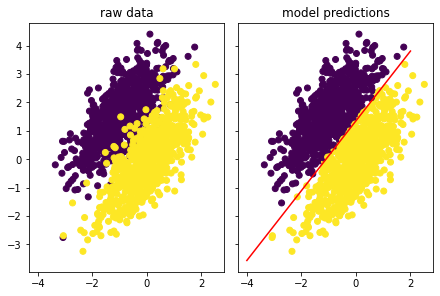

In [71]:
axs = (plt.figure(constrained_layout=True)
       .subplots(1, 2, sharex=True, sharey=True))

axs[0].scatter(inputs[:,0], inputs[:,1], c= targets[:,0])
axs[1].plot(x, y, "-r")
axs[1].scatter(inputs[:,0], inputs[:,1], c= pred_grp)

axs[0].set_title('raw data')
axs[1].set_title('model predictions')